In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 12)

In [2]:

emotion_score = pd.read_csv('Tokyo_score_raw.txt', index_col=0, sep='\s+')
emotion_score.index = emotion_score.index.astype('datetime64[ns]')
emotion_score.tail()

,anger,contempt,disgust,fear,happiness,neutral,sadness,surprise,lat,lon,emotion_score
photo_take_date,,,,,,,,,,,
2012-07-14,0.000329,7.734480e-04,4.670549e-04,1.021171e-03,0.000523,9.681706e-01,2.022196e-02,0.008494,35.681166,139.691500,-0.627436
2012-07-15,0.000573,1.311513e-02,1.995140e-04,2.309755e-04,0.713370,2.674879e-01,1.450483e-03,0.003573,35.700833,139.770666,0.371973
2012-07-15,0.000001,4.914434e-09,3.858178e-09,4.448203e-06,0.999801,3.878443e-07,1.792386e-09,0.000193,35.700833,139.770666,0.763873
2012-07-25,0.000007,2.074236e-10,6.051371e-07,2.411453e-07,0.999988,1.784350e-09,4.871895e-09,0.000004,35.698486,139.772277,0.764011
2014-07-19,0.000680,2.969420e-07,6.141732e-03,9.449401e-08,0.993167,1.266541e-06,7.655694e-06,0.000002,35.667303,139.696633,0.759039


In [3]:
stock = pd.read_csv('N225_data.txt', sep='\s+', index_col=0)
stock.index = stock.index.astype('datetime64[ns]')
stock.tail()

,Open,High,Low,Close
Date,,,,
2016-12-26,19394.41,19432.48,19385.94,19396.64
2016-12-27,19353.43,19478.58,19352.06,19403.06
2016-12-28,19392.11,19442.13,19364.73,19401.72
2016-12-29,19301.04,19301.04,19092.22,19145.14
2016-12-30,18997.68,19176.81,18991.59,19114.37


数据读入完毕，开始按照一定的时间段进行汇总并计算相关性

按照周来进行相关（之前有考虑过照片过少而导致的拟合的问题，现在先不考虑这个情况）
`count = emotion_all['emotion_score'].resample('MS').count()`

In [4]:
gp1 = emotion_score['emotion_score'].resample('MS').mean()
std1 = gp1.std()
miu1 = gp1.mean()
gp11 = (gp1-miu1)/std1  ## 此处进行了汇总之后才进行了归一化，如果不做汇总，归一化结果图像是沿着坐标中紧密波动的
gp11.tail()

photo_take_date
2016-09-01    1.277746
2016-10-01    0.676013
2016-11-01    0.914818
2016-12-01    0.103882
2017-01-01    4.221895
Freq: MS, Name: emotion_score, dtype: float64

In [5]:
gp2 = stock['Close'].resample('MS').mean()
std2 = gp2.std()
miu2 = gp2.mean()
gp22 = (gp2-miu2) /std2
gp22.tail()

Date
2016-08-01    0.488016
2016-09-01    0.530276
2016-10-01    0.616242
2016-11-01    0.797189
2016-12-01    1.182199
Freq: MS, Name: Close, dtype: float64

相关系数 为 -0.16922352525717094


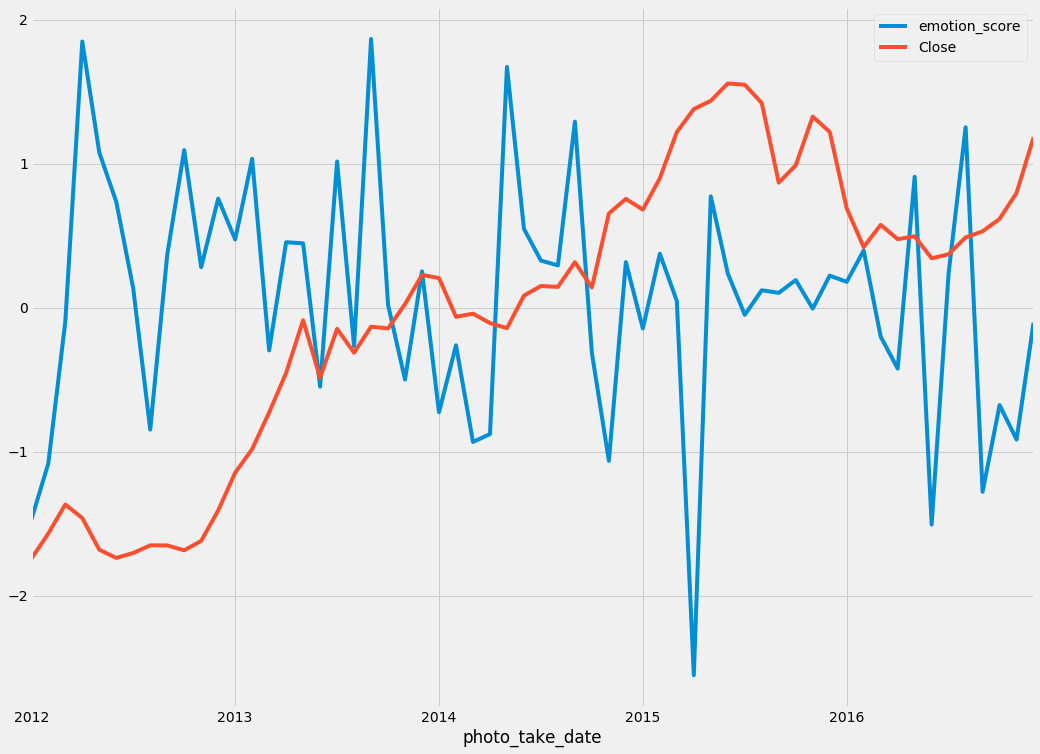

In [6]:
df = pd.concat([-gp11, gp22], axis=1, join='inner')
df.plot()
print("相关系数 为 {}".format(df.corr()['emotion_score']['Close']))